<a href="https://colab.research.google.com/github/kellygaioni/ds_by_kelly/blob/main/Random_Forest_Dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com dados desbalanceados

## Carregamento da base de dados

In [2]:
import pandas as pd
import random
import numpy as np

In [9]:
dataset = pd.read_csv('/content/csv_result-ebay_confianca_completo.csv')

In [10]:
dataset.shape

(5806, 75)

In [11]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [12]:
# Transforma uma coluna de strin em uma coluna boleana, classificando true o 'S' e false o 'N'
dataset['blacklist'] = dataset['blacklist'] == 'S'

<Axes: xlabel='reputation', ylabel='count'>

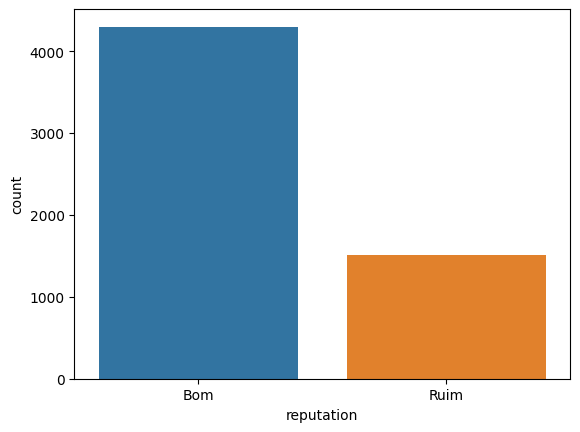

In [13]:
import seaborn as sns
sns.countplot(x='reputation', data=dataset)

In [ ]:
len(dataset.columns)

75

In [ ]:
X = dataset.iloc[:,0:74].values

In [ ]:
X.shape

(1819, 74)

In [ ]:
y = dataset.iloc[:,74].values

In [ ]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([1357,  462]))

## Base de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((1455, 74), (1455,))

In [ ]:
X_teste.shape, y_teste.shape

((364, 74), (364,))

## Classificação com Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [ ]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7527472527472527

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
X_under.shape, y_under.shape

((1707, 74), (1707,))

In [ ]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([1357,  462]))

In [ ]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([1245,  462]))

In [ ]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under,
                                                                          test_size = 0.2, stratify = y_under)
X_treinamento_u.shape, X_teste_u.shape

((1365, 74), (342, 74))

In [ ]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.7573099415204678

## Sobreamostragem (oversampling) - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
X_over.shape, y_over.shape

((2714, 74), (2714,))

In [ ]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([1357,  462]))

In [ ]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([1357, 1357]))

In [ ]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2, stratify = y_over)
X_treinamento_o.shape, X_teste_o.shape

((2171, 74), (543, 74))

In [ ]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8342541436464088